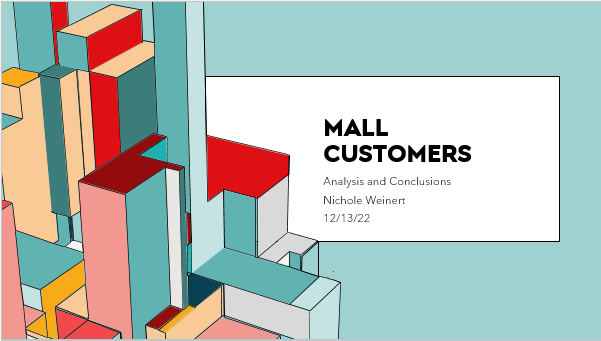

# Load Packages and Data

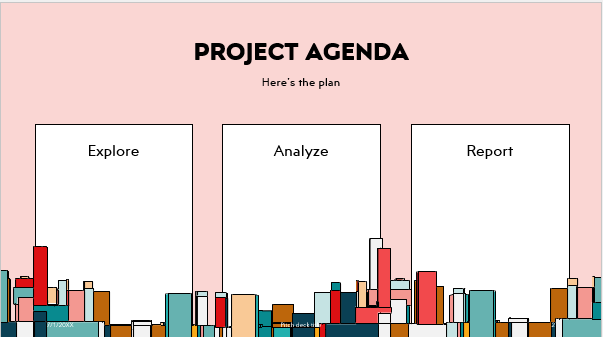

In [1]:
# Import and Clean Data
import pandas as pd

# Analyze Data
import researchpy as rp
from scipy.stats import ttest_ind 

# Visualize Data
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
df = pd.read_csv(r'C:\Users\nikki\OneDrive\Pictures\Data Science\Personal Learning\Mall Customers\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_income_k,Spending_Score_1_100
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


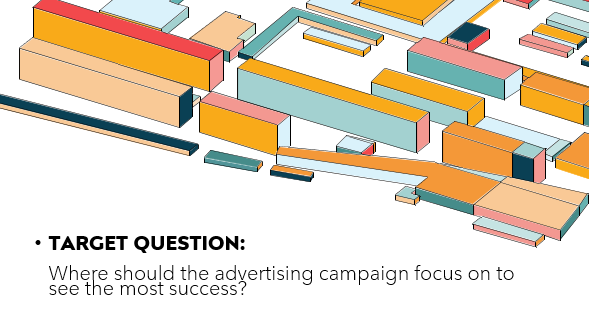

In [3]:
# Group Spending Data

df['SpendingGroups'] = pd.cut(x=df['Spending_Score_1_100'], bins=[0, 20, 40, 60, 80, 100], labels= ['Very Low', 'Low', 'Medium', 'High', 'Very High'])
df.head()

,CustomerID,Genre,Age,Annual_income_k,Spending_Score_1_100,SpendingGroups
0,1,Male,19,15,39,Low
1,2,Male,21,15,81,Very High
2,3,Female,20,16,6,Very Low
3,4,Female,23,16,77,High
4,5,Female,31,17,40,Low


In [4]:
df.Age.describe()

count    200.000000
mean      38.850000
std       13.969007
min       18.000000
25%       28.750000
50%       36.000000
75%       49.000000
max       70.000000
Name: Age, dtype: float64

In [5]:
# Age Groups

df['AgeGroups'] = pd.cut(x=df['Age'], bins=[0,20,40,60, 80], labels=['Teen', 'Young Adult', 'Middle Aged', 'Elderly'])
df.AgeGroups.value_counts()

Young Adult    105
Middle Aged     61
Teen            17
Elderly         17
Name: AgeGroups, dtype: int64

In [6]:
df.head()

,CustomerID,Genre,Age,Annual_income_k,Spending_Score_1_100,SpendingGroups,AgeGroups
0,1,Male,19,15,39,Low,Teen
1,2,Male,21,15,81,Very High,Young Adult
2,3,Female,20,16,6,Very Low,Teen
3,4,Female,23,16,77,High,Young Adult
4,5,Female,31,17,40,Low,Young Adult


<AxesSubplot:>

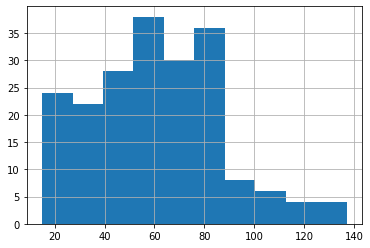

In [7]:
df.Annual_income_k.hist()

In [8]:
df['IncomeGroup'] = pd.cut(x=df['Annual_income_k'], bins=[0,32,53,106,200], labels=['Low', 'Lower Middle', 'Middle', 'Upper'])
df.IncomeGroup.value_counts()

Middle          118
Lower Middle     42
Low              32
Upper             8
Name: IncomeGroup, dtype: int64

In [9]:
df.head()

,CustomerID,Genre,Age,Annual_income_k,Spending_Score_1_100,SpendingGroups,AgeGroups,IncomeGroup
0,1,Male,19,15,39,Low,Teen,Low
1,2,Male,21,15,81,Very High,Young Adult,Low
2,3,Female,20,16,6,Very Low,Teen,Low
3,4,Female,23,16,77,High,Young Adult,Low
4,5,Female,31,17,40,Low,Young Adult,Low


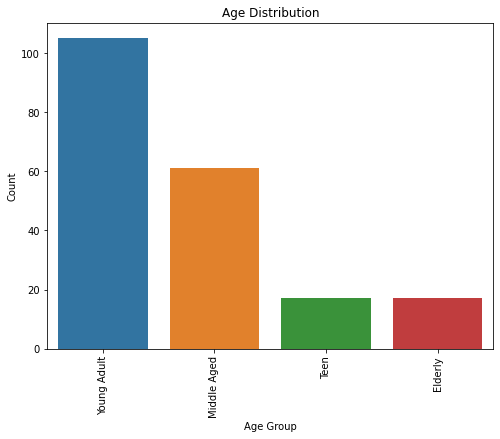

In [10]:
country_count = Counter(df['AgeGroups'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

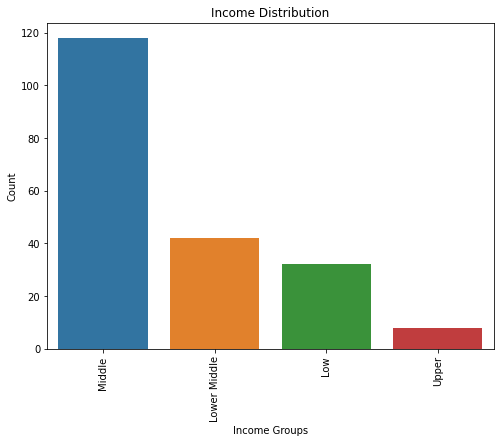

In [11]:
country_count = Counter(df['IncomeGroup'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Income Distribution')
plt.xlabel('Income Groups')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

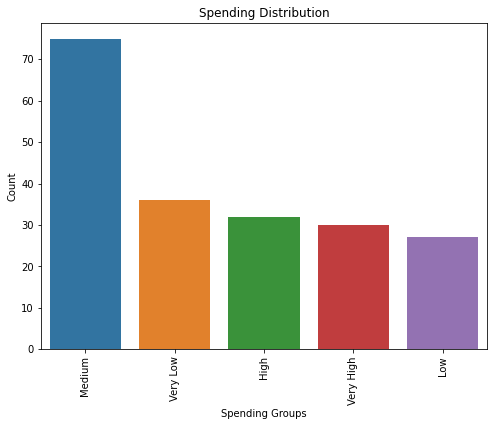

In [12]:
country_count = Counter(df['SpendingGroups'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Spending Distribution')
plt.xlabel('Spending Groups')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

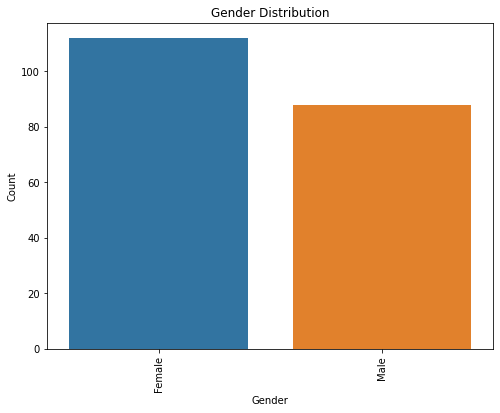

In [13]:
country_count = Counter(df['Genre'].dropna().tolist()).most_common(10)
country_idx = [country[0] for country in country_count]
country_val = [country[1] for country in country_count]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = country_idx,y=country_val ,ax =ax)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

In [14]:
# Export Current Dataset
df.to_csv(r'C:\Users\nikki\OneDrive\Pictures\Data Science\Personal Learning\Mall Customers\bins_added.csv')


In [15]:
df.corr()

,CustomerID,Age,Annual_income_k,Spending_Score_1_100
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual_income_k,0.977548,-0.012398,1.000000,0.009903
Spending_Score_1_100,0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

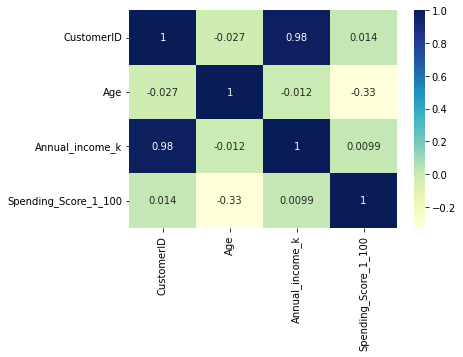

In [16]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Generate some sample data for two groups
group1 = df['Annual_income_k']
group2 = df['Spending_Score_1_100']

# Conduct the independent t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print the t-statistic and p-value
print(t_stat)
print(p_value)


3.9777223489261595
8.26603602199058e-05


In [18]:
# Generate some sample data for two groups
group1 = df['Age']
group2 = df['Spending_Score_1_100']

# Conduct the independent t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print the t-statistic and p-value
print(t_stat)
print(p_value)

-5.467142466545633
8.08944054851429e-08


In [19]:
# Generate some sample data for two groups
group1 = df['Annual_income_k']
group2 = df['Age']

# Conduct the independent t-test
t_stat, p_value = ttest_ind(group1, group2)

# Print the t-statistic and p-value
print(t_stat)
print(p_value)

10.3207404229345
2.7530597297782657e-22


## Pearson's correlation

In [21]:
import numpy as np
from scipy.stats import pearsonr

# Generate some sample data
x = df['Annual_income_k']
y = df['Spending_Score_1_100']

# Calculate the Pearson correlation coefficient
r, p = pearsonr(x, y)

# Print the correlation coefficient and p-value
print(r)
print(p)

# No Significance

0.009902848094037601
0.8893134370274359


In [22]:
# Generate some sample data
x = df['Age']
y = df['Spending_Score_1_100']

# Calculate the Pearson correlation coefficient
r, p = pearsonr(x, y)

# Print the correlation coefficient and p-value
print(r)
print(p)

-0.3272268460390901
2.2502957035653357e-06


In [23]:
# Generate some sample data
x = df['Age']
y = df['Annual_income_k']

# Calculate the Pearson correlation coefficient
r, p = pearsonr(x, y)

# Print the correlation coefficient and p-value
print(r)
print(p)

-0.012398042736060162
0.8616748930180701


# Age Group Analysis

In [25]:
df.AgeGroups.value_counts()

Young Adult    105
Middle Aged     61
Teen            17
Elderly         17
Name: AgeGroups, dtype: int64

In [56]:
df.AgeGroups.value_counts(normalize=True)

Young Adult    0.525
Middle Aged    0.305
Teen           0.085
Elderly        0.085
Name: AgeGroups, dtype: float64

In [26]:
Teen = df[df['AgeGroups']=='Teen']
YoungAdult = df[df['AgeGroups']=='Young Adult']
MiddleAged = df[df['AgeGroups'] == 'Middle Aged']
Elderly = df[df['AgeGroups'] == 'Elderly']

In [30]:
Teen.Annual_income_k.mean(), YoungAdult.Annual_income_k.mean(), MiddleAged.Annual_income_k.mean(), Elderly.Annual_income_k.mean()

(51.11764705882353, 63.542857142857144, 61.0, 50.0)

In [31]:
Teen.Spending_Score_1_100.mean(), YoungAdult.Spending_Score_1_100.mean(), MiddleAged.Spending_Score_1_100.mean(), Elderly.Spending_Score_1_100.mean()

(44.64705882352941, 61.666666666666664, 33.68852459016394, 44.1764705882353)

In [40]:
YoungAdult.Genre.value_counts()

Female    64
Male      41
Name: Genre, dtype: int64

In [32]:
FemaleYoungAdults = YoungAdult[YoungAdult['Genre']== 'Female']
FemaleYoungAdults.head()

,CustomerID,Genre,Age,Annual_income_k,Spending_Score_1_100,SpendingGroups,AgeGroups,IncomeGroup
3,4,Female,23,16,77,High,Young Adult,Low
4,5,Female,31,17,40,Low,Young Adult,Low
5,6,Female,22,17,76,High,Young Adult,Low
6,7,Female,35,18,6,Very Low,Young Adult,Low
7,8,Female,23,18,94,Very High,Young Adult,Low


In [36]:
FemaleYoungAdults.Annual_income_k.mean(), FemaleYoungAdults.Spending_Score_1_100.mean()

(59.875, 61.796875)

In [41]:
FemaleYoungAdults.SpendingGroups.value_counts(normalize=True), FemaleYoungAdults.IncomeGroup.value_counts(normalize=True)

(High         0.281250
 Medium       0.250000
 Very High    0.250000
 Low          0.203125
 Very Low     0.015625
 Name: SpendingGroups, dtype: float64,
 Middle          0.593750
 Low             0.203125
 Lower Middle    0.171875
 Upper           0.031250
 Name: IncomeGroup, dtype: float64)

In [33]:
MaleYoungAdults = YoungAdult[YoungAdult['Genre']== 'Male']
MaleYoungAdults.head()

,CustomerID,Genre,Age,Annual_income_k,Spending_Score_1_100,SpendingGroups,AgeGroups,IncomeGroup
1,2,Male,21,15,81,Very High,Young Adult,Low
14,15,Male,37,20,13,Very Low,Young Adult,Low
15,16,Male,22,20,79,High,Young Adult,Low
20,21,Male,35,24,35,Low,Young Adult,Low
21,22,Male,25,24,73,High,Young Adult,Low


In [37]:
MaleYoungAdults.Annual_income_k.mean(), MaleYoungAdults.Spending_Score_1_100.mean()

(69.26829268292683, 61.46341463414634)

In [48]:
df.shape

(200, 8)

In [46]:
df.SpendingGroups.value_counts()

Medium       75
Very Low     36
High         32
Very High    30
Low          27
Name: SpendingGroups, dtype: int64

In [49]:
df.IncomeGroup.value_counts()

Middle          118
Lower Middle     42
Low              32
Upper             8
Name: IncomeGroup, dtype: int64

In [55]:
YoungAdult.SpendingGroups.value_counts(normalize=True), YoungAdult.IncomeGroup.value_counts(normalize=True)

(High         0.285714
 Very High    0.276190
 Medium       0.219048
 Low          0.133333
 Very Low     0.085714
 Name: SpendingGroups, dtype: float64,
 Middle          0.619048
 Low             0.200000
 Lower Middle    0.123810
 Upper           0.057143
 Name: IncomeGroup, dtype: float64)

In [43]:
MiddleAged.SpendingGroups.value_counts(normalize=True), MiddleAged.IncomeGroup.value_counts(normalize=True)

(Medium       0.475410
 Very Low     0.344262
 Low          0.180328
 High         0.000000
 Very High    0.000000
 Name: SpendingGroups, dtype: float64,
 Middle          0.590164
 Lower Middle    0.278689
 Low             0.098361
 Upper           0.032787
 Name: IncomeGroup, dtype: float64)

In [52]:
Teen.SpendingGroups.value_counts(normalize=True), Teen.IncomeGroup.value_counts(normalize=True)

(Medium       0.529412
 Very Low     0.235294
 High         0.117647
 Low          0.058824
 Very High    0.058824
 Name: SpendingGroups, dtype: float64,
 Middle          0.529412
 Lower Middle    0.294118
 Low             0.176471
 Upper           0.000000
 Name: IncomeGroup, dtype: float64)

In [53]:
Elderly.SpendingGroups.value_counts(normalize=True), Elderly.IncomeGroup.value_counts(normalize=True)

(Medium       0.823529
 Very Low     0.117647
 Low          0.058824
 High         0.000000
 Very High    0.000000
 Name: SpendingGroups, dtype: float64,
 Middle          0.470588
 Lower Middle    0.411765
 Low             0.117647
 Upper           0.000000
 Name: IncomeGroup, dtype: float64)

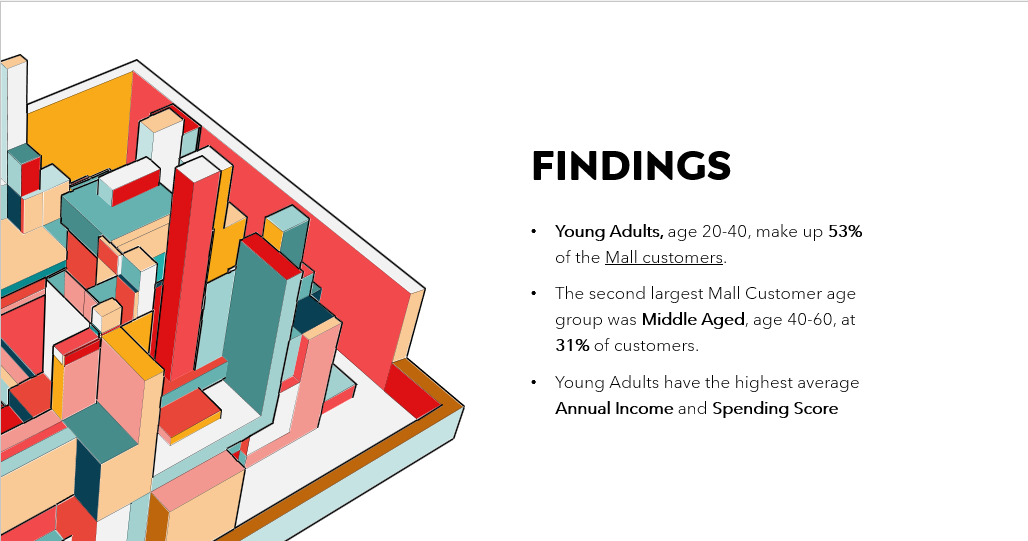

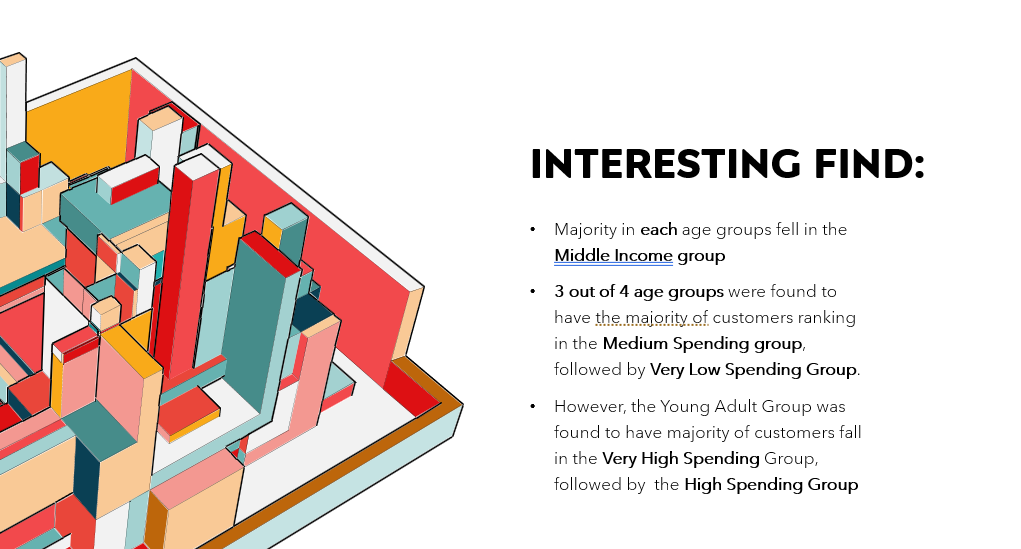

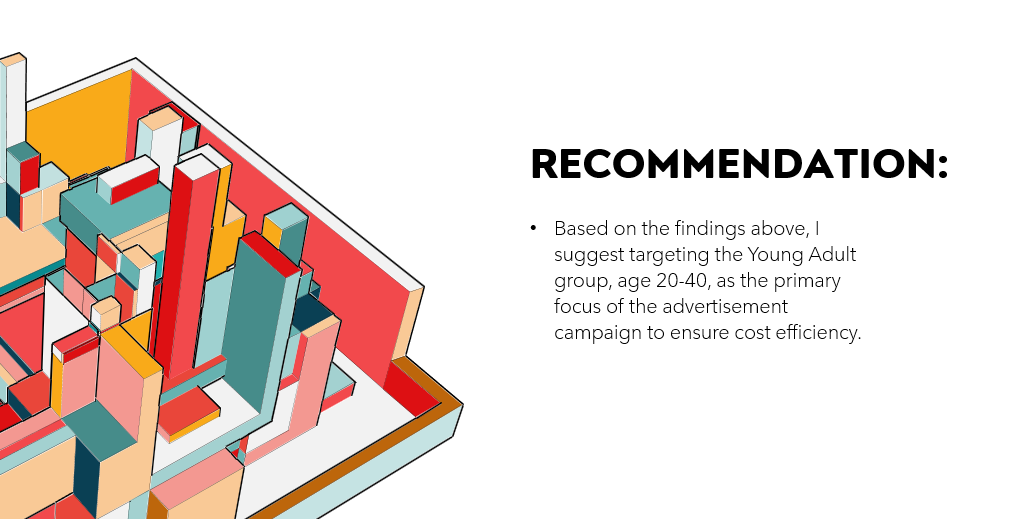